In [1]:
import pandas as pd
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import rbf_functions

rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

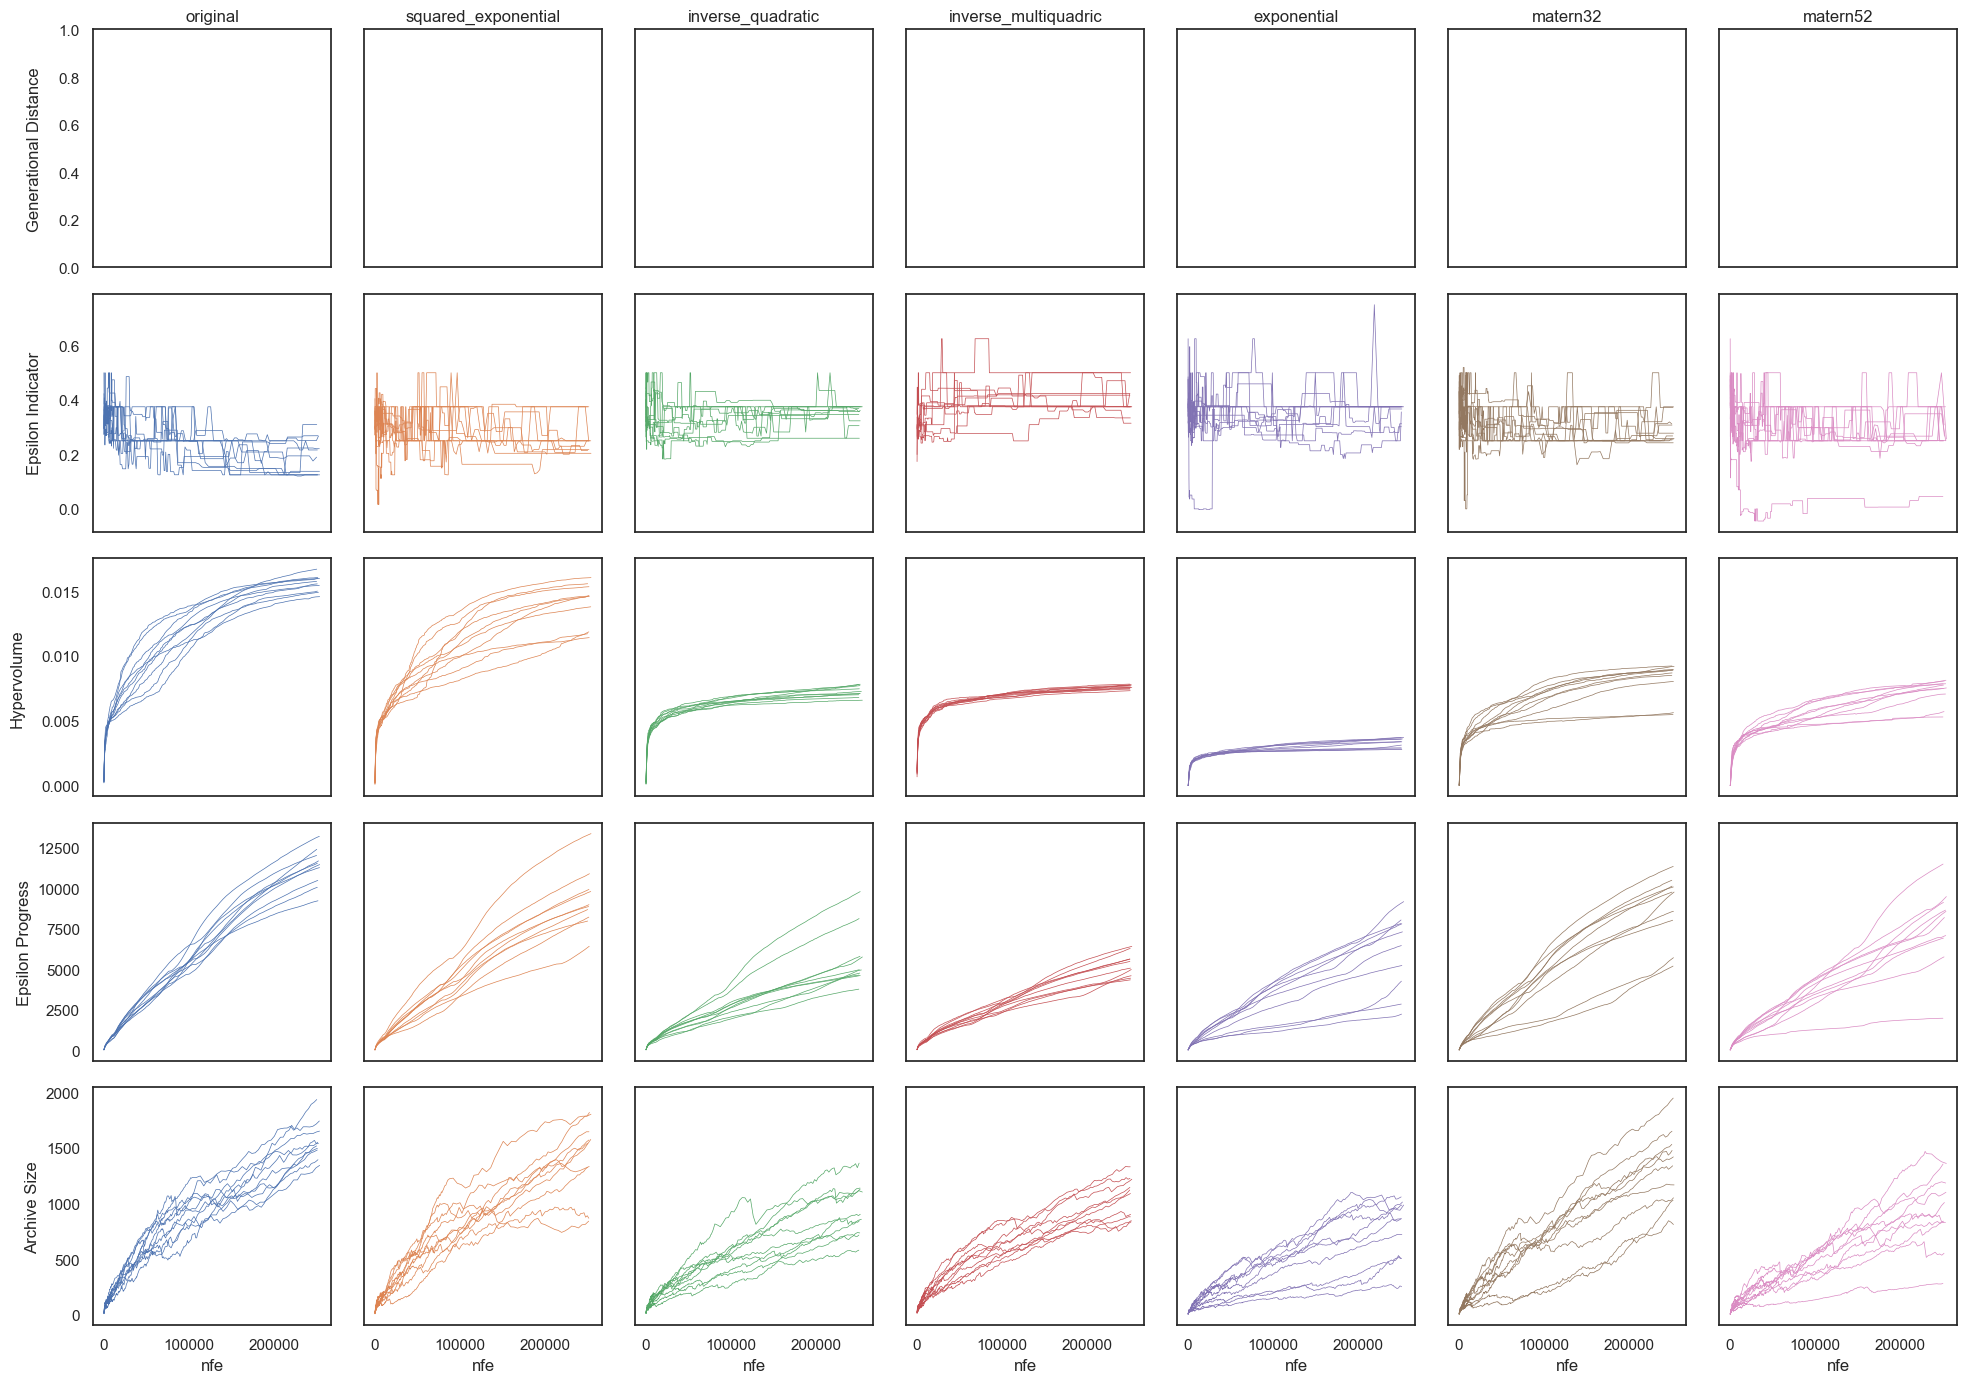

In [31]:
fig, axes = plt.subplots(5, 7, sharex=True, sharey='row', figsize=(20,14)) #


# for i, entry in enumerate(rbfs):
for i, (entry, c) in enumerate(zip(rbfs, sns.color_palette())):
    rbf = entry.__name__
    df_hv = pd.read_csv(f"calculated_metrics/hv_{rbf}_global.csv")
    df_ei = pd.read_csv(f"calculated_metrics/ei_{rbf}_global.csv")
    # df_gd = pd.read_csv(f"gd_global/{rbf}_gd_all.csv")
    # df_gd_nfe = pd.read_csv(f"gd_global/{rbf}_gd_nfe_all.csv")
    ep_nfe = {}
    ep_prog = {}
    archive_nfe = {}
    archive_count = {}
    out_dir = f"../output/{rbf}/"
    for j in os.listdir(out_dir):
        if j.endswith("_convergence.csv"):
            ep_load = pd.read_csv(out_dir + j)
            ep_nfe[int(j.split("_")[0])] = ep_load.nfe
            ep_prog[int(j.split("_")[0])]  = ep_load.improvements
        if j.endswith("_hypervolume.csv"):
            archives_by_nfe = pd.read_csv(out_dir + j)
            dups = archives_by_nfe.pivot_table(columns=["Unnamed: 0"], aggfunc='size')
            archive_nfe[int(j.split("_")[0])] = dups.index
            archive_count[int(j.split("_")[0])] = dups.reset_index(drop=True)
    ep_nfe = pd.DataFrame.from_dict(ep_nfe)
    ep_prog = pd.DataFrame.from_dict(ep_prog)
    archive_nfe = pd.DataFrame.from_dict(archive_nfe, orient='index').T
    archive_size = pd.DataFrame.from_dict(archive_count, orient='index').T   
    
    # ax[0,i].plot(df_gd_nfe, df_gd, color=c, lw=0.5)
    
    
    
    for _, entry in df_ei.groupby('seed'):
        axes[1,i].plot(entry.nfe, entry.hypervolume, color=c, lw=0.5)

    for _, entry in df_hv.groupby('seed'):
        axes[2,i].plot(entry.nfe, entry.hypervolume, color=c, lw=0.5)
    
    axes[3,i].plot(ep_nfe, ep_prog, color=c, lw=0.5)
    axes[4,i].plot(archive_nfe, archive_size, color=c, lw=0.5)
    
    for ax in axes[:, i]:
        ax.set_box_aspect(1)
    

    if i == 0: 
        axes[2,i].set_ylabel("Hypervolume", labelpad=12) #, rotation=45, labelpad=40
        axes[1,i].set_ylabel("Epsilon Indicator", labelpad=12)
        axes[0,i].set_ylabel("Generational Distance", labelpad=12)
        axes[3,i].set_ylabel("Epsilon Progress", labelpad=4)
        axes[4,i].set_ylabel("Archive Size", labelpad=4)
    axes[4,i].set_xlabel("nfe")
    axes[0,i].set_title(rbf[:-4])


fig.tight_layout()
# fig.suptitle('RBF metrics compared')
plt.savefig(f'figs/metrics_combined.png')
plt.savefig(f'figs/metrics_combined.pdf')

In [28]:
df_ei = pd.read_csv(f"calculated_metrics/ei_{rbf}_global.csv", index_col='Unnamed: 0')

In [29]:
df_ei

,nfe,hypervolume,seed
0,100,0.267166,70
1,200,0.267166,70
2,300,0.363818,70
3,400,0.328997,70
4,500,0.330663,70
...,...,...,...
3458,230812,0.375000,40
3459,236791,0.375000,40
3460,242571,0.375000,40
3461,248351,0.500000,40


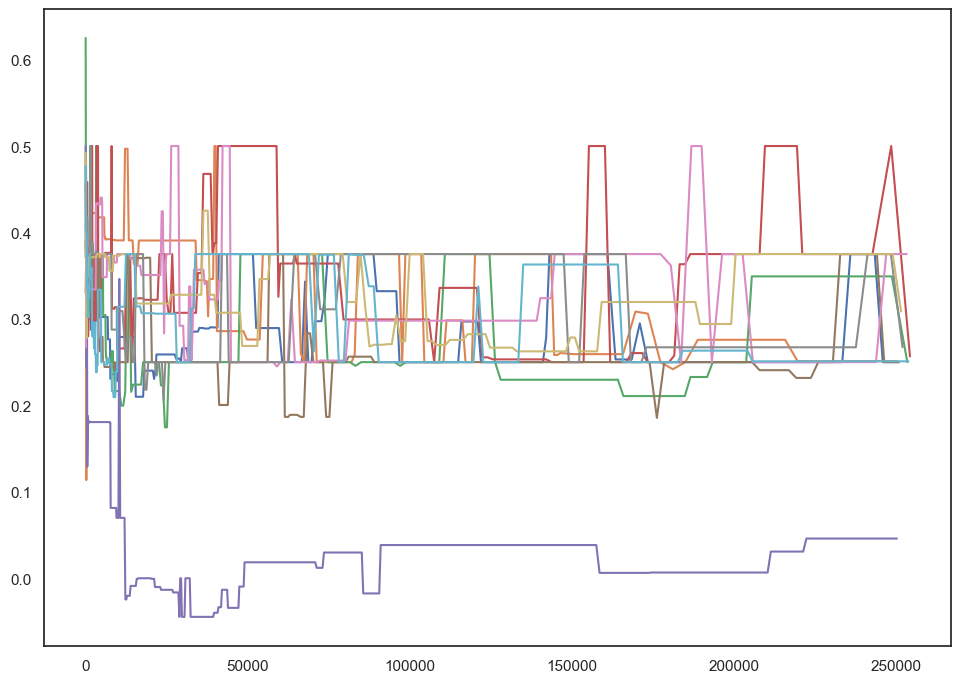

In [30]:
fig, ax = plt.subplots()
for _, entry in df_ei.groupby('seed'):
    ax.plot(entry.nfe, entry.hypervolume)